# <p style="background-color: #4CAF50; font-family: 'Arial', sans-serif; font-weight: bold; color: #FFFFFF; font-size: 120%; text-align: center; border: 1px solid #FFFFFF; border-radius: 10px; padding: 10px; box-shadow: 0 4px 15px rgba(0, 0, 0, 0.2);">🧠Mental Health Status Analysis🤯</p>


<div style="padding: 20px; border: 2px solid black; font-family: 'Comic Sans MS'; line-height: 1.5em; width: 75%; margin: 0 auto;">
    <p style="font-size: 20px; color: black;">
        <strong>Objective:</strong><br>
        This notebook aims to utilize the K-Nearest Neighbors (KNN) algorithm to perform binary classification on mental health data. Through exploratory data analysis (EDA), we will reveal insights and trends related to mental health status. The analysis will investigate key factors such as academic pressure, work-life balance, and personal history. Data visualization techniques will be employed to effectively communicate findings, supporting data-driven decision-making in predicting mental health outcomes.<br>
    </p>
</div>
div>


# <p style="background-color: #4CAF50; font-family: 'Arial', sans-serif; font-weight: bold; color: #FFFFFF; font-size: 80%; text-align: center; border: 1px solid #FFFFFF; border-radius: 10px; padding: 10px; box-shadow: 0 4px 15px rgba(0, 0, 0, 0.2);">🚀 Importing the Brainy Packages</p>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import optuna
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

# <p style="background-color: #4CAF50; font-family: 'Arial', sans-serif; font-weight: bold; color: #FFFFFF; font-size: 80%; text-align: center; border: 1px solid #FFFFFF; border-radius: 10px; padding: 10px; box-shadow: 0 4px 15px rgba(0, 0, 0, 0.2);">📖 Reading the Data (Let’s Get Some Insight!)</p>


In [2]:
train = pd.read_csv('/kaggle/input/playground-series-s4e11/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s4e11/test.csv')
submission = pd.read_csv('/kaggle/input/playground-series-s4e11/sample_submission.csv')

In [3]:
train.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

In [5]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,140700.0,70349.500000,40616.735775,0.00,35174.75,70349.50,105524.25,140699.0
Age,140700.0,40.388621,12.384099,18.00,29.00,42.00,51.00,60.0
Academic Pressure,27897.0,3.142273,1.380457,1.00,2.00,3.00,4.00,5.0
Work Pressure,112782.0,2.998998,1.405771,1.00,2.00,3.00,4.00,5.0
CGPA,27898.0,7.658636,1.464466,5.03,6.29,7.77,8.92,10.0
Study Satisfaction,27897.0,2.944940,1.360197,1.00,2.00,3.00,4.00,5.0
Job Satisfaction,112790.0,2.974404,1.416078,1.00,2.00,3.00,4.00,5.0
Work/Study Hours,140700.0,6.252679,3.853615,0.00,3.00,6.00,10.00,12.0
Financial Stress,140696.0,2.988983,1.413633,1.00,2.00,3.00,4.00,5.0
Depression,140700.0,0.181713,0.385609,0.00,0.00,0.00,0.00,1.0


In [6]:
train.isnull().sum()

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

# <p style="background-color: #4CAF50; font-family: 'Arial', sans-serif; font-weight: bold; color: #FFFFFF; font-size: 80%; text-align: center; border: 1px solid #FFFFFF; border-radius: 10px; padding: 10px; box-shadow: 0 4px 15px rgba(0, 0, 0, 0.2);">🧹 Cleaning & Preprocessing (Cleaning the Mess!)</p>


In [7]:
dietary_mapping = {
    'More Healthy': 'Healthy',
    'Yes': 'Healthy',
    'No': 'Unhealthy',
    'No Healthy': 'Unhealthy',
    'Less Healthy': 'Moderate',
    'Less than Healthy': 'Unhealthy',
    'Hormonal': 'Moderate'
}

values_to_replace = [
    'Pratham', 'BSc', 'Gender', '3', 'Mihir', '1.0', 
    'Electrician', 'M.Tech', 'Vegas', 'Male', 
    'Indoor', 'Class 12', '2'
]

In [8]:
degree = {
    "BCom": "B.Com", "B.Com": "B.Com", "B.Comm": "B.Com",
    "B.Tech": "B.Tech", "BTech": "B.Tech", "B.T": "B.Tech",
    "BSc": "B.Sc", "B.Sc": "B.Sc", "Bachelor of Science": "B.Sc",
    "BArch": "B.Arch", "B.Arch": "B.Arch",
    "BA": "B.A", "B.A": "B.A",
    "BBA": "BBA", "BB": "BBA",
    "BCA": "BCA",
    "BE": "BE",
    "BEd": "B.Ed", "B.Ed": "B.Ed",
    "BPharm": "B.Pharm", "B.Pharm": "B.Pharm",
    "BHM": "BHM",
    "LLB": "LLB", "LL B": "LLB", "LL BA": "LLB", "LL.Com": "LLB", "LLCom": "LLB",
    "MCom": "M.Com", "M.Com": "M.Com",
    "M.Tech": "M.Tech", "MTech": "M.Tech", "M.T": "M.Tech",
    "MSc": "M.Sc", "M.Sc": "M.Sc", "Master of Science": "M.Sc",
    "MBA": "MBA",
    "MCA": "MCA",
    "MD": "MD",
    "ME": "ME",
    "MEd": "M.Ed", "M.Ed": "M.Ed",
    "MArch": "M.Arch", "M.Arch": "M.Arch",
    "MPharm": "M.Pharm", "M.Pharm": "M.Pharm",
    "MA": "MA", "M.A": "MA",
    "MPA": "MPA",
    "LLM": "LLM",
    "PhD": "PhD",
    "MBBS": "MBBS",
    "CA": "CA",
    "Class 12": "Class 12", "12th": "Class 12",
    "Class 11": "Class 11", "11th": "Class 11"
}

In [9]:
def categorize_degree(degree_name):
    pg = {"M.Com", "M.Tech", "M.Sc", "MBA", "MCA", "MD", "ME", "M.Ed", "M.Arch", "M.Pharm", "MA", "MPA", "LLM", "PhD"}
    ug = {"B.Com", "B.Tech", "B.Sc", "B.Arch", "B.A", "BBA", "BCA", "BE", "B.Ed", "B.Pharm", "BHM", "LLB"}
    schooling = {"Class 12", "Class 11"}
    
    if degree_name in pg:
        return "PG"
    elif degree_name in ug:
        return "UG"
    elif degree_name in schooling:
        return "Schooling"
    else:
        return "Unknown"

In [10]:
def categorize_sleep_duration(duration):
    if 'Less than 5 hours' in duration or '1-2 hours' in duration or 'No' in duration:
        return 'Less than 5 hours'
    elif '6-8 hours' in duration or '5-6 hours' in duration or '6-7 hours' in duration:
        return '6-8 hours'
    elif 'More than 8 hours' in duration or '9-11 hours' in duration or '10-11 hours' in duration:
        return 'More than 8 hours'
    else:
        return 'Other'

In [11]:
# Drop Column
train.drop(columns=['id','Name'], inplace=True) 

# Fill na with mode
mode1 = train['Financial Stress'].mode()[0]  
train['Financial Stress'].fillna(mode1, inplace=True)

mode2 = train['Degree'].mode()[0]  
train['Degree'].fillna(mode2, inplace=True)

mean1 = round(train['CGPA'].mean())
train['CGPA'].fillna(mean1, inplace=True)

train['Academic Pressure'].fillna(0, inplace=True)
train['Profession'].fillna('unknown', inplace=True)
train['Work Pressure'].fillna(0, inplace=True)
train.replace(values_to_replace, 'Unknown', inplace=True)
train['Dietary Habits'].replace(dietary_mapping, inplace=True)
train['Dietary Habits'].fillna('Unknown', inplace=True)
train['Job Satisfaction'].fillna(0, inplace=True)
train['Study Satisfaction'].fillna(0, inplace=True)
train['Degree'] = train['Degree'].map(degree).fillna('Unknown')
train['Degree_Category'] = train['Degree'].apply(categorize_degree)
train = train.drop(columns=['Degree'])
train['Sleep Duration'] = train['Sleep Duration'].apply(categorize_sleep_duration)

# Data type conversion
train['Age'] = train['Age'].astype(int)
train['Financial Stress'] = train['Financial Stress'].astype(int)
train['Work/Study Hours'] = train['Work/Study Hours'].astype(int)
train['Academic Pressure'] = train['Academic Pressure'].astype(int)
train['Work Pressure'] = train['Work Pressure'].astype(int)
train['Job Satisfaction'] = train['Job Satisfaction'].astype(int)
train['Study Satisfaction'] = train['Study Satisfaction'].astype(int)

In [12]:
# Drop Column
test.drop(columns=['id','Name'], inplace=True)

# Fill na with mode
mode1 = test['Financial Stress'].mode()[0]  
test['Financial Stress'].fillna(mode1, inplace=True)

mode2 = test['Degree'].mode()[0]  
test['Degree'].fillna(mode2, inplace=True)

mean1 = round(test['CGPA'].mean())
test['CGPA'].fillna(mean1, inplace=True)

test['Academic Pressure'].fillna(0, inplace=True)
test['Profession'].fillna('unknown', inplace=True)
test['Work Pressure'].fillna(0, inplace=True)
test.replace(values_to_replace, 'Unknown', inplace=True)
test['Dietary Habits'].replace(dietary_mapping, inplace=True)
test['Dietary Habits'].fillna('Unknown', inplace=True)
test['Job Satisfaction'].fillna(0, inplace=True)
test['Study Satisfaction'].fillna(0, inplace=True)
test['Degree'] = test['Degree'].map(degree).fillna('Unknown')
test['Degree_Category'] = test['Degree'].apply(categorize_degree)
test = test.drop(columns=['Degree'])
test['Sleep Duration'] = test['Sleep Duration'].apply(categorize_sleep_duration)

# Data type conversion
test['Age'] = test['Age'].astype(int)
test['Financial Stress'] = test['Financial Stress'].astype(int)
test['Work/Study Hours'] = test['Work/Study Hours'].astype(int)
test['Academic Pressure'] = test['Academic Pressure'].astype(int)
test['Work Pressure'] = test['Work Pressure'].astype(int)
test['Job Satisfaction'] = test['Job Satisfaction'].astype(int)
test['Study Satisfaction'] = test['Study Satisfaction'].astype(int)

In [13]:
train.isnull().sum()

Gender                                   0
Age                                      0
City                                     0
Working Professional or Student          0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
Degree_Category                          0
dtype: int64

In [14]:
cat_col = train.select_dtypes(include=['object']).columns
print("Object Column Names:", cat_col.tolist())

Object Column Names: ['Gender', 'City', 'Working Professional or Student', 'Profession', 'Sleep Duration', 'Dietary Habits', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness', 'Degree_Category']


In [15]:
object_columns = ['Gender', 'City', 'Working Professional or Student', 'Profession', 
                  'Sleep Duration', 'Dietary Habits', 'Have you ever had suicidal thoughts ?', 
                  'Family History of Mental Illness', 'Degree_Category']

In [16]:
label_encoder = LabelEncoder()

for column in object_columns:
    train[column] = label_encoder.fit_transform(train[column])

In [17]:
train.head()

,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Degree_Category
0,0,49,50,1,10,0,5,8.00,0,2,2,0,0,1,2,0,0,2
1,1,26,92,1,54,0,4,8.00,0,3,1,2,1,7,3,0,1,2
2,1,33,96,0,64,5,0,8.97,2,0,0,0,1,3,1,0,1,2
3,1,22,62,1,54,0,5,8.00,0,1,1,1,1,10,1,1,1,2
4,0,30,37,1,9,0,1,8.00,0,1,0,2,1,9,4,1,0,2


# <p style="background-color: #4CAF50; font-family: 'Arial', sans-serif; font-weight: bold; color: #FFFFFF; font-size: 80%; text-align: center; border: 1px solid #FFFFFF; border-radius: 10px; padding: 10px; box-shadow: 0 4px 15px rgba(0, 0, 0, 0.2);">💥 Splitting the Data (Time to Split & Conquer!)</p>


In [18]:
X = train.drop(['Depression'], axis=1)
y = train['Depression']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [20]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (126630, 17)
X_test shape: (14070, 17)
y_train shape: (126630,)
y_test shape: (14070,)


# <p style="background-color: #4CAF50; font-family: 'Arial', sans-serif; font-weight: bold; color: #FFFFFF; font-size: 80%; text-align: center; border: 1px solid #FFFFFF; border-radius: 10px; padding: 10px; box-shadow: 0 4px 15px rgba(0, 0, 0, 0.2);">🧑‍🏫 Model Training (Train Your Mind, Train Your Model!)</p>


In [21]:
knn = KNeighborsClassifier(n_neighbors=18, weights='distance', metric='manhattan')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=18, weights='distance')

# <p style="background-color: #4CAF50; font-family: 'Arial', sans-serif; font-weight: bold; color: #FFFFFF; font-size: 80%; text-align: center; border: 1px solid #FFFFFF; border-radius: 10px; padding: 10px; box-shadow: 0 4px 15px rgba(0, 0, 0, 0.2);">💥 Model Performance (Testing the Brainpower!)</p>


In [22]:
y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.924591329068941


In [23]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95     11512
           1       0.79      0.79      0.79      2558

    accuracy                           0.92     14070
   macro avg       0.87      0.87      0.87     14070
weighted avg       0.92      0.92      0.92     14070



In [24]:
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Confusion Matrix:
 [[10984   528]
 [  533  2025]]


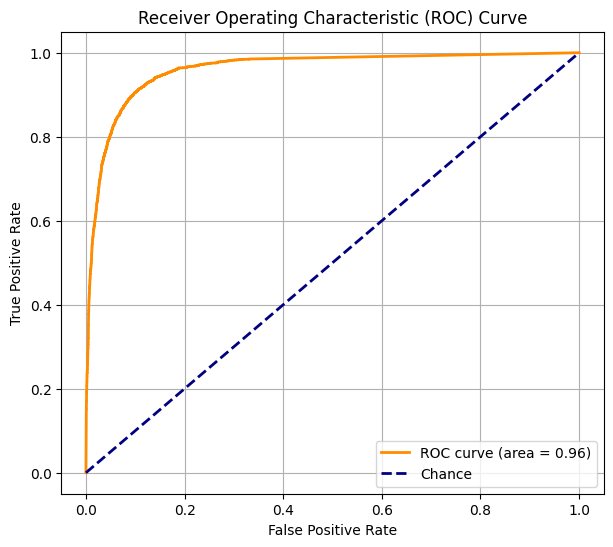

In [25]:
y_proba = knn.predict_proba(X_test)[:, 1]  
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

# <p style="background-color: #4CAF50; font-family: 'Arial', sans-serif; font-weight: bold; color: #FFFFFF; font-size: 80%; text-align: center; border: 1px solid #FFFFFF; border-radius: 10px; padding: 10px; box-shadow: 0 4px 15px rgba(0, 0, 0, 0.2);">🎯 Prediction Power: Performance & Results 🔮</p>


In [26]:
le = LabelEncoder()

for column in object_columns:
    test[column] = le.fit_transform(test[column])

In [27]:
test.head()

,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Degree_Category
0,1,53,67,1,26,0,2,8.00,0,5,1,8,0,9,3,1,1
1,0,58,25,1,19,0,2,8.00,0,4,1,8,0,6,4,0,1
2,1,53,21,1,54,0,4,8.00,0,1,3,8,1,12,4,0,1
3,0,23,46,0,63,5,0,6.84,1,0,2,8,1,10,4,0,2
4,1,47,22,1,54,0,5,8.00,0,5,3,8,1,3,4,0,1


In [28]:
test_preds = knn.predict_proba(test)[:, 1]
submission = pd.DataFrame({'id': submission['id'], 
                           'Depression': np.round(test_preds)})

In [29]:
print(submission.head(10))

       id  Depression
0  140700         0.0
1  140701         0.0
2  140702         0.0
3  140703         1.0
4  140704         0.0
5  140705         0.0
6  140706         0.0
7  140707         0.0
8  140708         0.0
9  140709         1.0


In [30]:
submission.to_csv('submission.csv', index=False)
print("File Saved!!")

File Saved!!


<div style="padding: 20px; border: 2px solid black; font-family: 'Comic Sans MS'; line-height: 1.5em; width: 75%; margin: 0 auto;">
    <p style="font-size: 20px; color: black;">
        <strong>Conclusion:</strong><br>
        
The K-Nearest Neighbors (KNN) model achieved a strong overall accuracy of 92.46%, demonstrating its effectiveness in binary classification. The performance metrics show a high level of precision, recall, and F1-score (0.95) for Class 0 (non-mental health issues), indicating the model's reliability in identifying individuals without mental health concerns. For Class 1 (mental health issues), the model achieved moderate metrics (0.79 for precision, recall, and F1-score), reflecting some difficulty in detecting cases of mental health issues, likely due to class imbalance. The confusion matrix further supports these findings, with 10,984 true negatives, 2,025 true positives, and relatively few misclassifications (528 false positives and 533 false negatives). The macro-averaged metrics (0.87) suggest balanced performance across both classes, while the weighted averages (0.92) confirm the model's robustness in handling the dataset’s class distribution. Overall, the model provides valuable predictions, but there is room for improvement, particularly in enhancing recall for the minority class.<br>
    </p>
</div>
div>
